# Coursework 1: Image filtering

In this coursework you will practice techniques for image filtering. The coursework includes coding questions and written questions. Please read both the text and the code in this notebook to get an idea what you are expected to implement.

## What to do?

* Complete and run the code using `jupyter-lab` or `jupyter-notebook` to get the results.

* Export (File | Save and Export Notebook As...) the notebook as a PDF file, which contains your code, results and answers, and upload the PDF file onto [Scientia](https://scientia.doc.ic.ac.uk).

* Instead of clicking the Export button, you can also run the following command instead: `jupyter nbconvert coursework_01_solution.ipynb --to pdf`

* If Jupyter complains about some problems in exporting, it is likely that pandoc (https://pandoc.org/installing.html) or latex is not installed, or their paths have not been included. You can install the relevant libraries and retry. Alternatively, use the Print function of your browser to export the PDF file.

* If Jupyter-lab does not work for you at the end (we hope not), you can use Google Colab to write the code and export the PDF file.

## Dependencies:

You need to install Jupyter-Lab (https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) and other libraries used in this coursework, such as by running the command:
`pip3 install [package_name]`


In [101]:
# Import libaries (provided)
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import noise
import scipy
import scipy.signal
import math
import time

## 1. Moving average filter (20 points).

Read the provided input image, add noise to the image and design a moving average filter for denoising.

You are expected to design the kernel of the filter and then perform 2D image filtering using the function `scipy.signal.convolve2d()`.

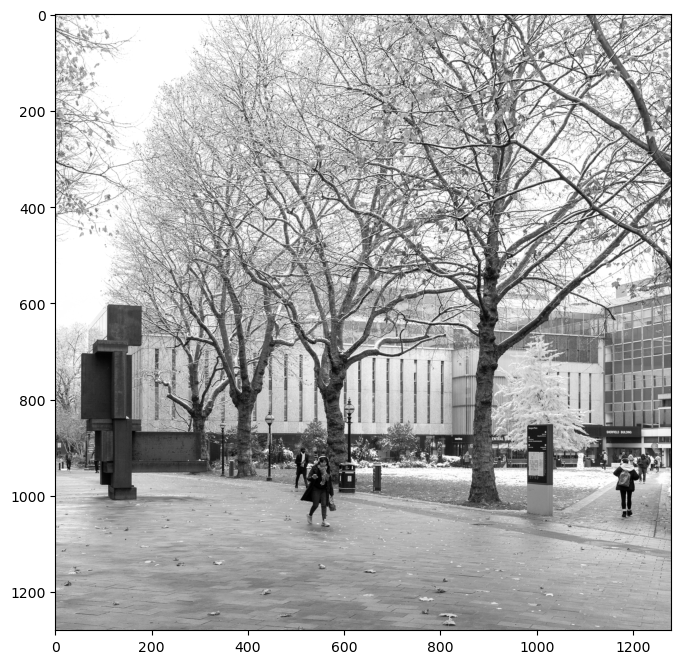

In [102]:
# Read the image (provided)
image = imageio.imread("campus_snow.jpg")
plt.imshow(image, cmap="gray")
plt.gcf().set_size_inches(8, 8)

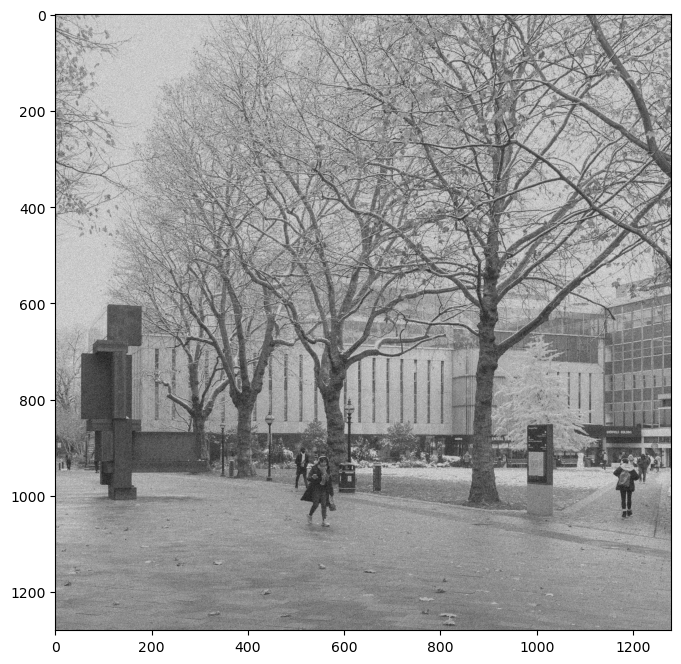

In [103]:
# Corrupt the image with Gaussian noise (provided)
image_noisy = noise.add_noise(image, "gaussian")
plt.imshow(image_noisy, cmap="gray")
plt.gcf().set_size_inches(8, 8)

### Note: from now on, please use the noisy image as the input for the filters.

### 1.1 Filter the noisy image with a 3x3 moving average filter. Show the filtering results.

Filter h:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


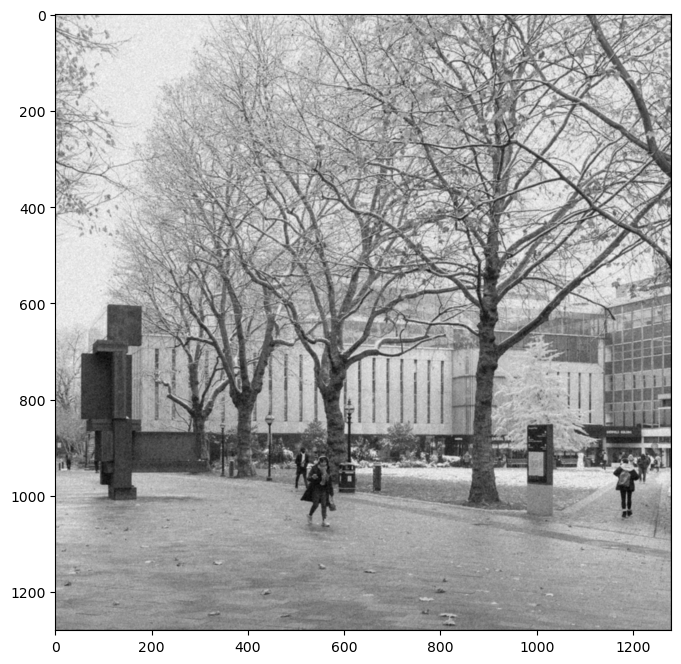

In [104]:
# Design the filter h
### Insert your code ###
h = np.ones(shape=(3, 3)) / 9

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve2d(in1=image_noisy, in2=h, mode="same")

# Print the filter (provided)
print("Filter h:")
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap="gray")
plt.gcf().set_size_inches(8, 8)

### 1.2 Filter the noisy image with a 11x11 moving average filter.

Filter h:
[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.008

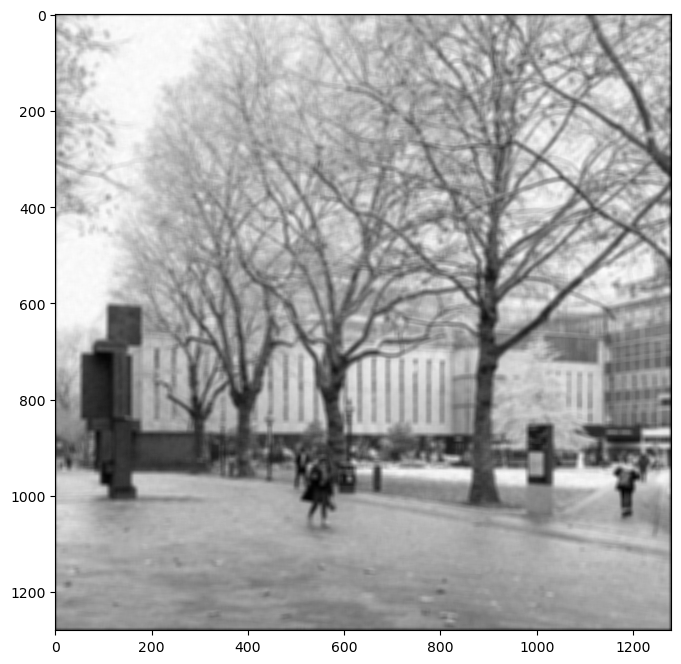

In [105]:
# Design the filter h
### Insert your code ###
h = np.ones(shape=(11, 11)) / 121

# Convolve the corrupted image with h using scipy.signal.convolve2d function
### Insert your code ###
image_filtered = scipy.signal.convolve(image_noisy, h, "same")

# Print the filter (provided)
print("Filter h:")
print(h)

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap="gray")
plt.gcf().set_size_inches(8, 8)

### 1.3 Comment on the filtering results. How do different kernel sizes influence the filtering results?

We see a clear smoothing with the help of moving average. The larger the kernel size, the more smoothing effect we get. 
This also implies that with larger kernel sizes, we lose more details in the image.


## 2. Edge detection (56 points).

Perform edge detection using Sobel filtering, as well as Gaussian + Sobel filtering.

### 2.1 Implement 3x3 Sobel filters and convolve with the noisy image.

sobel_x:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
sobel_y:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


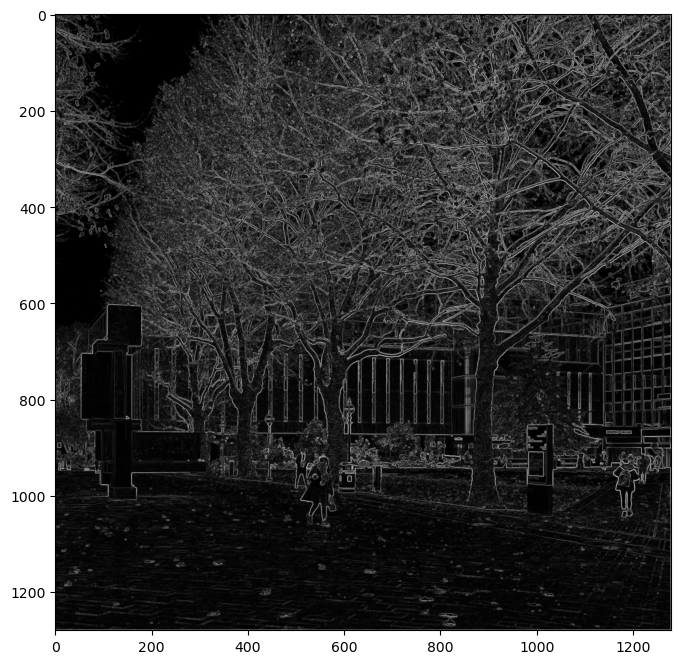

In [106]:
# Design the filters
### Insert your code ###
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = sobel_x.T

# Image filtering
g_x = scipy.signal.convolve2d(image, sobel_x, mode="same")
g_y = scipy.signal.convolve2d(image, sobel_y, mode="same")

# Calculate the gradient magnitude
grad_mag = np.sqrt(g_x**2 + g_y**2)

# Print the filters (provided)
print("sobel_x:")
print(sobel_x)
print("sobel_y:")
print(sobel_y)

# Display the magnitude map (provided)
plt.imshow(grad_mag, cmap="gray")
plt.gcf().set_size_inches(8, 8)

### 2.2 Implement a function that generates a 2D Gaussian filter given the parameter $\sigma$.

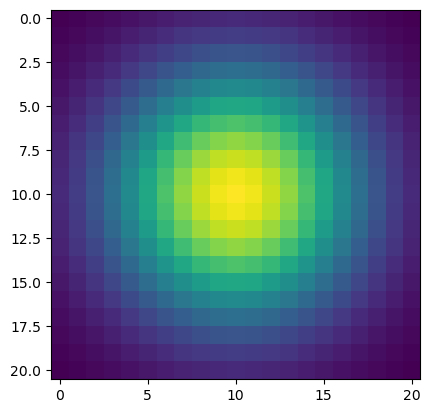

In [107]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    size = 4 * sigma + 1
    h = np.zeros(shape=(size, size))
    c = 2 * sigma
    for i in range(size):
        for j in range(size):
            h[i, j] = np.exp(-((i - c) ** 2 + (j - c) ** 2) / (2 * sigma**2))
    h /= h.sum()
    return h


# Visualise the Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
plt.imshow(h)

### 2.3 Perform Gaussian smoothing ($\sigma$ = 5 pixels) and evaluate the computational time for Gaussian smoothing. After that, perform Sobel filtering and show the gradient magintude map.

Exec time:  1.165251124999486


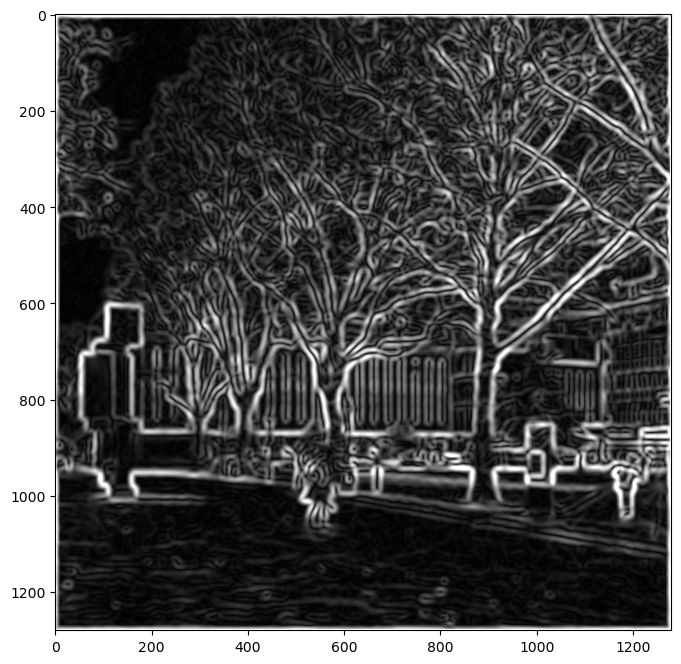

In [108]:
# Construct the Gaussian filter
sigma = 5
gauss_h = gaussian_filter_2d(sigma)

# Perform Gaussian smoothing and count time
t1 = time.perf_counter()
img_gauss = scipy.signal.convolve2d(image_noisy, gauss_h, mode="same")
print("Exec time: ", time.perf_counter() - t1)
# Image filtering
g_x = scipy.signal.convolve2d(img_gauss, sobel_x, mode="same")
g_y = scipy.signal.convolve2d(img_gauss, sobel_y, mode="same")

# Calculate the gradient magnitude
grad_mag = np.sqrt(g_x**2 + g_y**2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag, cmap="gray", vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

### 2.4 Implement a function that generates a 1D Gaussian filter given the parameter $\sigma$. Generate 1D Gaussian filters along x-axis and y-axis respectively.

Shape of h_x (1, 21)
Shape of h_y (21, 1)


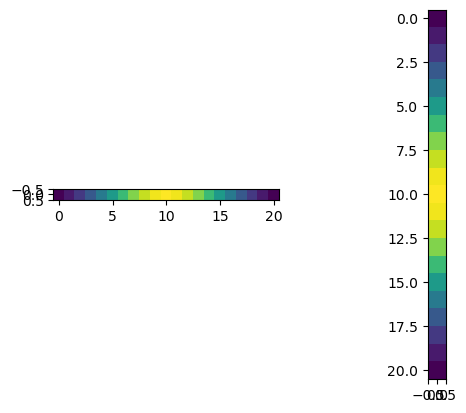

In [109]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    size = 4 * sigma + 1
    h = np.arange(size)
    c = 2 * sigma
    h = np.exp(-((h - c) ** 2) / (2 * sigma**2))
    h /= np.sqrt(h.sum())
    return h


# sigma = 5 pixel (provided)
sigma = 5

# The Gaussian filter along x-axis. Its shape is (1, sz).
### Insert your code ###
h_x = gaussian_filter_1d(sigma=sigma).reshape(1, -1)
print("Shape of h_x", h_x.shape)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
### Insert your code ###
h_y = gaussian_filter_1d(sigma=sigma).reshape(-1, 1)
print("Shape of h_y", h_y.shape)

# Visualise the filters (provided)
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

### 2.5 Perform Gaussian smoothing ($\sigma$ = 5 pixels) using two separable filters and evaluate the computational time for separable Gaussian filtering. After that, perform Sobel filtering, show the gradient magnitude map and check whether it is the same as the previous one without separable filtering.

Exec time:  0.19326070899842307
Pixelwise mean diff:  2.8562925127590806e-13


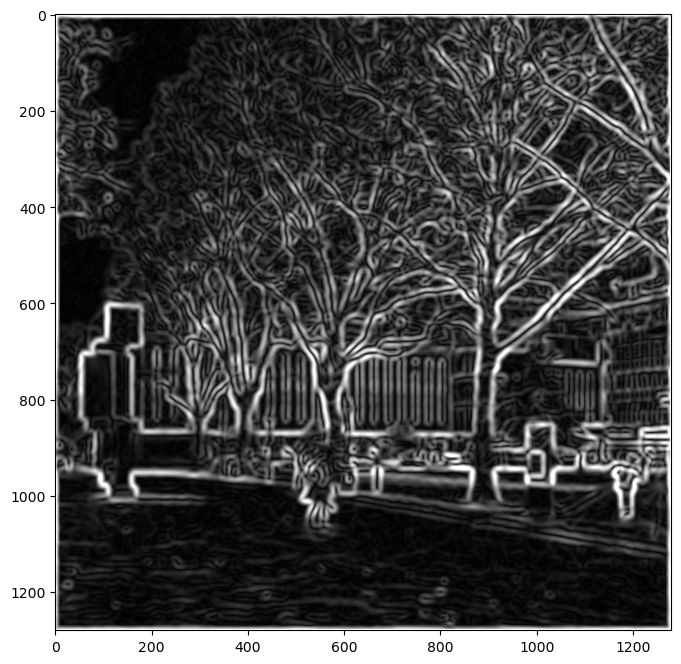

In [110]:
# Perform separable Gaussian smoothing and count time
t1 = time.perf_counter()
img_gauss = scipy.signal.convolve2d(image_noisy, h_x, mode="same")
img_gauss = scipy.signal.convolve2d(img_gauss, h_y, mode="same")
img_gauss /= h_x.sum() ** 2
print("Exec time: ", time.perf_counter() - t1)

# Image filtering
g_x = scipy.signal.convolve2d(img_gauss, sobel_x, mode="same")
g_y = scipy.signal.convolve2d(img_gauss, sobel_y, mode="same")

# Calculate the gradient magnitude
grad_mag2 = np.sqrt(g_x**2 + g_y**2)

# Display the gradient magnitude map (provided)
plt.imshow(grad_mag2, cmap="gray", vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

# Check the difference between the current gradient magnitude map
# and the previous one produced without separable filtering. You
# can report the mean difference between the two.
print("Pixelwise mean diff: ", np.mean(np.abs(grad_mag - grad_mag2)))

### 2.6 Comment on the Gaussian + Sobel filtering results and the computational time.

We obtain the exact same results. Pixelwise absolute difference is 1e-12, which can be attributed to floating point approximation error. Computation time improved from 1.17 s to 0.17 s on my machine, which is pretty significant.

The complexity of a convolution is $O(n^2m^2)$, where $n$ and $m$ are the dimensions of the image and the kernel, respectively. In the case of separable filtering, the complexity is $O(n^2m)$, which is much lower. This is because we can apply the 1D filter along the rows and then along the columns, which is much faster than applying the 2D filter directly.

The larger the filter is, the higher the computation gain will be. We could improve the computation time even more by reducing the size of the kernel to only 2 sigmas, but with the cost of lower fidelity.

## 3. Challenge: Implement 2D image filters using Pytorch (24 points).

[Pytorch](https://pytorch.org/) is a machine learning framework that supports filtering and convolution.

The [Conv2D](https://pytorch.org/docs/stable/nn.html#conv2d) operator takes an input array of dimension NxC1xXxY, applies the filter and outputs an array of dimension NxC2xXxY. Here, since we only have one image with one colour channel, we will set N=1, C1=1 and C2=1. You can read the documentation of Conv2D for more detail.

In [111]:
# Import libaries (provided)
import torch

# Move tensors to Metal backend for Mac
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

### 3.1 Expand the dimension of the noisy image into 1x1xXxY and convert it to a Pytorch tensor.

In [ ]:
# Expand the dimension of the numpy array
h, w = image_noisy.shape
exp_noisy = image_noisy.reshape(1, 1, h, w)

# Convert to a Pytorch tensor using torch.from_numpy
noisy_tensor = torch.tensor(data=exp_noisy, dtype=torch.float32, device=device)

tensor([[[[189.9567, 229.9996, 232.0526,  ..., 253.1329, 269.5739, 272.9969],
          [189.4229, 185.4252, 189.8423,  ..., 273.3291, 286.1398, 249.6814],
          [172.0894,  97.9931, 183.5546,  ..., 170.0538, 138.1163,  79.2591],
          ...,
          [131.9941, 115.7940, 171.8460,  ..., 170.9615, 149.3343, 210.4190],
          [135.3658, 173.2260, 163.0168,  ..., 158.9452, 209.5641, 193.3285],
          [131.3271, 132.5685, 150.5474,  ..., 172.1833, 173.9579, 134.6481]]]],
       device='mps:0')

### 3.2 Create a Pytorch Conv2D filter, set its kernel to be a 2D Gaussian filter and perform filtering.

In [125]:
def module_from_filter(h: np.ndarray) -> torch.nn.Conv2d:
    n, m = h.shape
    h = h.reshape(1, 1, n, m)
    h = torch.tensor(data=h, dtype=torch.float32, device=device, requires_grad=False)
    h = torch.nn.Parameter(h, requires_grad=False).to(device=device)

    conv = torch.nn.Conv2d(
        in_channels=1,
        out_channels=1,
        padding="same",
        bias=False,
        kernel_size=h.shape[0],
        device=device,
    )
    conv.weight = h
    return conv

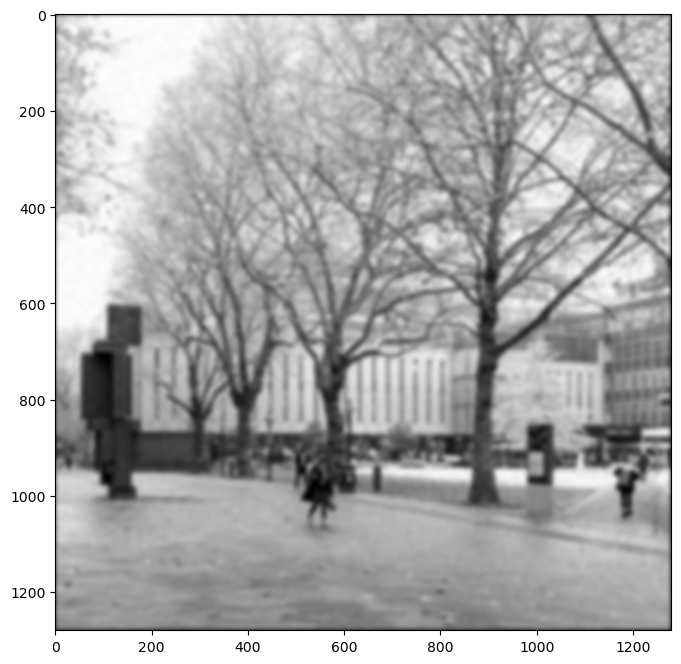

In [114]:
# A 2D Gaussian filter when sigma = 5 pixel (provided)
sigma = 5
h = gaussian_filter_2d(sigma)
h = h.reshape(1, 1, h.shape[0], h.shape[1])

# Create the Conv2D filter
conv = module_from_filter(h)

# Filtering
image_filtered = conv(noisy_tensor).detach().cpu().numpy()[0, 0]

# Display the filtering result (provided)
plt.imshow(image_filtered, cmap="gray")
plt.gcf().set_size_inches(8, 8)

### 3.3 Implement Pytorch Conv2D filters to perform Sobel filtering on Gaussian smoothed images, show the gradient magnitude map.

Exec time : 0.009244083979865536


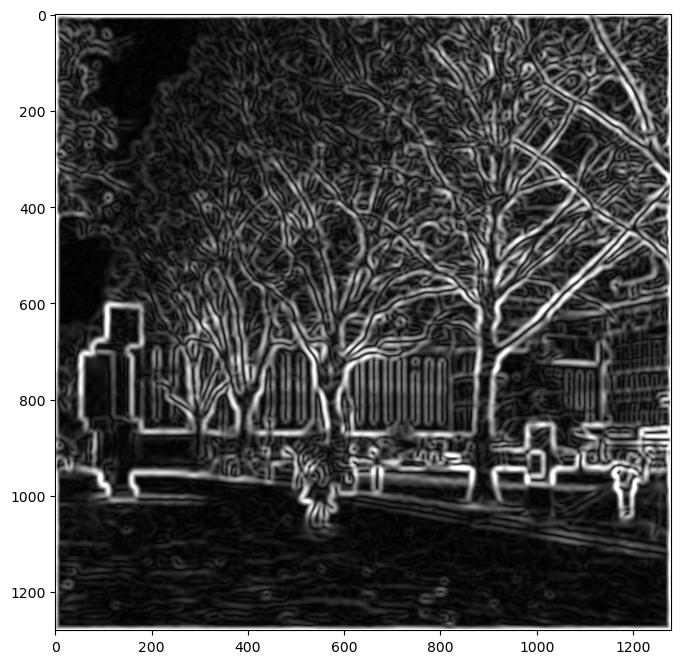

In [131]:
# Create Conv2D filters
sigma = 5
h_gauss = gaussian_filter_2d(sigma)
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = sobel_x.T

conv_gauss = module_from_filter(h_gauss)
conv_sobel_x = module_from_filter(sobel_x)
conv_sobel_y = module_from_filter(sobel_y)

# Perform filtering
t1 = time.perf_counter()
image_filtered = conv_gauss(noisy_tensor)
print("Exec time :", time.perf_counter() - t1)
g_x = conv_sobel_x(image_filtered)
g_y = conv_sobel_y(image_filtered)

# Calculate the gradient magnitude map
grad_mag3 = torch.sqrt(g_x**2 + g_y**2).detach().cpu().numpy()[0, 0]

# Visualise the gradient magnitude map (provided)
plt.imshow(grad_mag3, cmap="gray", vmin=0, vmax=100)
plt.gcf().set_size_inches(8, 8)

In [130]:
print("Pixelwise mean diff: ", np.mean(np.abs(grad_mag3 - grad_mag2)))

Pixelwise mean diff:  0.00014798651124886943
